<a href="https://colab.research.google.com/github/Ankit52790/Cloud-Service-Composition/blob/main/Cloud_Service_Composition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Summary


* Data Generation:
Creates random data for hotels, car rentals, and restaurants.
* Preferences Definition: Sets different weights for attributes according to the needs of different income classes.
* Normalization: Uses Z-scores to normalize data attributes.
# Genetic Algorithm:
* Population Initialization:
 Creates an initial population.
* Fitness Function: Evaluates how well an individual meets user preferences.
* Selection: Chooses the top-performing individuals.
* Crossover: Combines attributes of two parents to create a child.
* Mutation: Randomly alters an attribute of an individual.
* Execution: Runs the genetic algorithm for a set number of generations to find the best combination of services.

# Output:
Finds and prints the best services for each income class.
This structured approach ensures that the solution considers both negative (price) and positive (facilities) factors, thereby satisfying the needs of lower families, middle-class families, and rich familie

# 1.Importing Important Libraries

In [31]:
import random
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

# Ensuring reproducibility
random.seed(42)


# Generate Random  Values

In [32]:
# Sample data
hotels = [
    {'id': 'H1', 'price': 120, 'rating': 4.5, 'distance': 5, 'reservations': 300, 'service_quality': 4.8},
    {'id': 'H2', 'price': 150, 'rating': 4.7, 'distance': 3, 'reservations': 250, 'service_quality': 4.7},
    {'id': 'H3', 'price': 100, 'rating': 4.0, 'distance': 7, 'reservations': 200, 'service_quality': 4.5},
    {'id': 'H4', 'price': 200, 'rating': 4.9, 'distance': 2, 'reservations': 350, 'service_quality': 4.9},
    {'id': 'H5', 'price': 90, 'rating': 3.5, 'distance': 8, 'reservations': 150, 'service_quality': 4.0},
    {'id': 'H6', 'price': 110, 'rating': 4.1, 'distance': 6, 'reservations': 270, 'service_quality': 4.6},
    {'id': 'H7', 'price': 130, 'rating': 4.3, 'distance': 4, 'reservations': 290, 'service_quality': 4.7},
    {'id': 'H8', 'price': 140, 'rating': 4.4, 'distance': 3, 'reservations': 310, 'service_quality': 4.8},
    {'id': 'H9', 'price': 160, 'rating': 4.6, 'distance': 2, 'reservations': 330, 'service_quality': 4.9},
    {'id': 'H10', 'price': 170, 'rating': 4.8, 'distance': 1, 'reservations': 340, 'service_quality': 4.9},
    {'id': 'H11', 'price': 105, 'rating': 4.2, 'distance': 5, 'reservations': 310, 'service_quality': 4.6},
    {'id': 'H12', 'price': 125, 'rating': 4.4, 'distance': 4, 'reservations': 320, 'service_quality': 4.7},
    {'id': 'H13', 'price': 180, 'rating': 4.8, 'distance': 2, 'reservations': 350, 'service_quality': 4.9},
    {'id': 'H14', 'price': 115, 'rating': 4.1, 'distance': 6, 'reservations': 260, 'service_quality': 4.5},
    {'id': 'H15', 'price': 135, 'rating': 4.3, 'distance': 3, 'reservations': 280, 'service_quality': 4.7},
    {'id': 'H16', 'price': 95, 'rating': 3.7, 'distance': 7, 'reservations': 180, 'service_quality': 4.2},
    {'id': 'H17', 'price': 145, 'rating': 4.5, 'distance': 3, 'reservations': 310, 'service_quality': 4.8},
    {'id': 'H18', 'price': 165, 'rating': 4.7, 'distance': 2, 'reservations': 340, 'service_quality': 4.9},
    {'id': 'H19', 'price': 85, 'rating': 3.6, 'distance': 8, 'reservations': 170, 'service_quality': 4.1},
    {'id': 'H20', 'price': 155, 'rating': 4.6, 'distance': 2, 'reservations': 330, 'service_quality': 4.8},
]

car_rentals = [
    {'id': 'C1', 'price': 50, 'rating': 4.2, 'type': 'SUV', 'availability': 10, 'condition': 4.5},
    {'id': 'C2', 'price': 60, 'rating': 4.5, 'type': 'Sedan', 'availability': 15, 'condition': 4.7},
    {'id': 'C3', 'price': 40, 'rating': 3.8, 'type': 'Compact', 'availability': 5, 'condition': 4.0},
    {'id': 'C4', 'price': 70, 'rating': 4.6, 'type': 'SUV', 'availability': 12, 'condition': 4.6},
    {'id': 'C5', 'price': 55, 'rating': 4.1, 'type': 'Convertible', 'availability': 7, 'condition': 4.3},
    {'id': 'C6', 'price': 65, 'rating': 4.3, 'type': 'Sedan', 'availability': 14, 'condition': 4.5},
    {'id': 'C7', 'price': 75, 'rating': 4.7, 'type': 'Truck', 'availability': 9, 'condition': 4.8},
    {'id': 'C8', 'price': 45, 'rating': 3.9, 'type': 'Compact', 'availability': 6, 'condition': 4.2},
    {'id': 'C9', 'price': 80, 'rating': 4.4, 'type': 'SUV', 'availability': 13, 'condition': 4.7},
    {'id': 'C10', 'price': 85, 'rating': 4.8, 'type': 'Luxury', 'availability': 8, 'condition': 4.9},
    {'id': 'C11', 'price': 52, 'rating': 4.1, 'type': 'SUV', 'availability': 11, 'condition': 4.4},
    {'id': 'C12', 'price': 68, 'rating': 4.4, 'type': 'Sedan', 'availability': 16, 'condition': 4.6},
    {'id': 'C13', 'price': 35, 'rating': 3.7, 'type': 'Compact', 'availability': 4, 'condition': 3.9},
    {'id': 'C14', 'price': 72, 'rating': 4.5, 'type': 'SUV', 'availability': 13, 'condition': 4.7},
    {'id': 'C15', 'price': 58, 'rating': 4.0, 'type': 'Convertible', 'availability': 8, 'condition': 4.2},
    {'id': 'C16', 'price': 62, 'rating': 4.3, 'type': 'Sedan', 'availability': 14, 'condition': 4.4},
    {'id': 'C17', 'price': 78, 'rating': 4.6, 'type': 'Truck', 'availability': 10, 'condition': 4.8},
    {'id': 'C18', 'price': 48, 'rating': 3.9, 'type': 'Compact', 'availability': 5, 'condition': 4.1},
    {'id': 'C19', 'price': 82, 'rating': 4.5, 'type': 'SUV', 'availability': 12, 'condition': 4.7},
    {'id': 'C20', 'price': 90, 'rating': 4.9, 'type': 'Luxury', 'availability': 9, 'condition': 4.9},
]

restaurants = [
    {'id': 'R1', 'price': 30, 'rating': 4.6, 'cuisine': 'Italian', 'reviews': 150, 'cleanliness': 4.8},
    {'id': 'R2', 'price': 25, 'rating': 4.3, 'cuisine': 'Mexican', 'reviews': 120, 'cleanliness': 4.5},
    {'id': 'R3', 'price': 35, 'rating': 4.8, 'cuisine': 'French', 'reviews': 200, 'cleanliness': 4.9},
    {'id': 'R4', 'price': 40, 'rating': 4.7, 'cuisine': 'Japanese', 'reviews': 180, 'cleanliness': 4.7},
    {'id': 'R5', 'price': 20, 'rating': 4.0, 'cuisine': 'Chinese', 'reviews': 100, 'cleanliness': 4.2},
    {'id': 'R6', 'price': 45, 'rating': 4.9, 'cuisine': 'Indian', 'reviews': 250, 'cleanliness': 4.9},
    {'id': 'R7', 'price': 50, 'rating': 5.0, 'cuisine': 'American', 'reviews': 300, 'cleanliness': 5.0},
    {'id': 'R8', 'price': 28, 'rating': 4.4, 'cuisine': 'Mexican', 'reviews': 130, 'cleanliness': 4.6},
    {'id': 'R9', 'price': 33, 'rating': 4.5, 'cuisine': 'Italian', 'reviews': 160, 'cleanliness': 4.7},
    {'id': 'R10', 'price': 38, 'rating': 4.6, 'cuisine': 'Thai', 'reviews': 170, 'cleanliness': 4.8},
    {'id': 'R11', 'price': 32, 'rating': 4.5, 'cuisine': 'Italian', 'reviews': 155, 'cleanliness': 4.7},
    {'id': 'R12', 'price': 29, 'rating': 4.3, 'cuisine': 'Mexican', 'reviews': 125, 'cleanliness': 4.5},
    {'id': 'R13', 'price': 36, 'rating': 4.7, 'cuisine': 'French', 'reviews': 210, 'cleanliness': 4.9},
    {'id': 'R14', 'price': 42, 'rating': 4.8, 'cuisine': 'Japanese', 'reviews': 185, 'cleanliness': 4.8},
    {'id': 'R15', 'price': 22, 'rating': 4.1, 'cuisine': 'Chinese', 'reviews': 110, 'cleanliness': 4.3},
    {'id': 'R16', 'price': 48, 'rating': 4.9, 'cuisine': 'Indian', 'reviews': 255, 'cleanliness': 4.9},
    {'id': 'R17', 'price': 52, 'rating': 5.0, 'cuisine': 'American', 'reviews': 305, 'cleanliness': 5.0},
    {'id': 'R18', 'price': 27, 'rating': 4.4, 'cuisine': 'Mexican', 'reviews': 135, 'cleanliness': 4.6},
    {'id': 'R19', 'price': 34, 'rating': 4.6, 'cuisine': 'Italian', 'reviews': 165, 'cleanliness': 4.8},
    {'id': 'R20', 'price': 39, 'rating': 4.7, 'cuisine': 'Thai', 'reviews': 175, 'cleanliness': 4.9},
]




#  2.Defining User Preferences

Explanation:

* This dictionary defines the preferences for different income classes, specifying the weight of each attribute (price, rating, etc.) in the fitness function

In [33]:
# Define user preferences for different income classes
preferences = {
    'lower_family': {
        'price_weight': 0.5,
        'rating_weight': 0.2,
        'distance_weight': 0.1,
        'reservation_weight': 0.1,
        'service_quality_weight': 0.1,
        'availability_weight': 0.1,
        'condition_weight': 0.1,
        'review_weight': 0.1,
        'cleanliness_weight': 0.1
    },
    'middle_class': {
        'price_weight': 0.3,
        'rating_weight': 0.3,
        'distance_weight': 0.1,
        'reservation_weight': 0.1,
        'service_quality_weight': 0.2,
        'availability_weight': 0.2,
        'condition_weight': 0.2,
        'review_weight': 0.2,
        'cleanliness_weight': 0.2
    },
    'rich_family': {
        'price_weight': 0.1,
        'rating_weight': 0.4,
        'distance_weight': 0.1,
        'reservation_weight': 0.1,
        'service_quality_weight': 0.3,
        'availability_weight': 0.3,
        'condition_weight': 0.3,
        'review_weight': 0.3,
        'cleanliness_weight': 0.3
    }
}


In [34]:
# Genetic Algorithm parameters
POPULATION_SIZE = 20
GENERATIONS = 50
MUTATION_RATE = 0.1

# 3.Normalizing Data (Z-scores)

Explanation:

* This step normalizes the data using Z-scores, which makes different attributes comparable by converting them into the same scale.
* It calculates the mean and standard deviation for each attribute and then scales the attributes accordingly.

In [35]:
#Min-Max Scaling
#Min-Max Scaling Function
def min_max_scale(data, attributes):
    min_vals = {attr: min(item[attr] for item in data) for attr in attributes}
    max_vals = {attr: max(item[attr] for item in data) for attr in attributes}

    for item in data:
        for attr in attributes:
            item[f'{attr}_scaled'] = (item[attr] - min_vals[attr]) / (max_vals[attr] - min_vals[attr])

    return data


In [36]:

def calculate_z_scores(data, attributes):
    means = {attr: np.mean([item[attr] for item in data]) for attr in attributes}
    std_devs = {attr: np.std([item[attr] for item in data]) for attr in attributes}

    for item in data:
        for attr in attributes:
            item[f'{attr}_z'] = (item[attr] - means[attr]) / std_devs[attr]

    return data

Normalize Data

In [37]:

def normalize_data():
    global hotels, car_rentals, restaurants

    hotel_attrs = ['price', 'rating', 'distance', 'reservations', 'service_quality']
    car_attrs = ['price', 'rating', 'availability', 'condition']
    restaurant_attrs = ['price', 'rating', 'reviews', 'cleanliness']

    hotels = calculate_z_scores(hotels, hotel_attrs)
    car_rentals = calculate_z_scores(car_rentals, car_attrs)
    restaurants = calculate_z_scores(restaurants, restaurant_attrs)

normalize_data()

# 4.Genetic Algorithm Setup

Explanation:

* Population Initialization: This function creates an initial population by randomly selecting individuals from the options.

In [38]:
# Genetic Algorithm Functions

def initialize_population(options):
    return [random.choice(options) for _ in range(POPULATION_SIZE)]

 **Fitness Function:**
  This calculates the fitness of an individual based on user preferences. Higher fitness indicates a better match to the user’s preferences.

In [39]:
# Fitness Function
def fitness(individual, preferences):
    price_score = (1 / (1 + abs(individual['price_z']))) * preferences['price_weight']

    rating_score = individual['rating_z'] * preferences['rating_weight']

    distance_score = (1 / (1 + abs(individual['distance_z']))) * preferences['distance_weight'] if 'distance_z' in individual else 0

    reservation_score = (1 / (1 + abs(individual['reservations_z']))) * preferences['reservation_weight'] if 'reservations_z' in individual else 0

    service_quality_score = individual['service_quality_z'] * preferences['service_quality_weight'] if 'service_quality_z' in individual else 0

    availability_score = individual['availability_z'] * preferences['availability_weight'] if 'availability_z' in individual else 0

    condition_score = individual['condition_z'] * preferences['condition_weight'] if 'condition_z' in individual else 0

    review_score = (1 / (1 + abs(individual['reviews_z']))) * preferences['review_weight'] if 'reviews_z' in individual else 0

    cleanliness_score = individual['cleanliness_z'] * preferences['cleanliness_weight'] if 'cleanliness_z' in individual else 0

    return (price_score + rating_score + distance_score + reservation_score +
            service_quality_score + availability_score + condition_score +
            review_score + cleanliness_score)

 **Selection**

Explanation:

* Selection: This function selects the top half of the population based on their fitness scores for the next generation.

In [40]:
def selection(population, preferences):
    sorted_population = sorted(population, key=lambda x: fitness(x, preferences), reverse=True)
    return sorted_population[:POPULATION_SIZE // 2]


**Crossover**

Explanation:
This function combines attributes from two parents to create a new individual (child). It randomly selects attributes from either parent.

In [41]:
def crossover(parent1, parent2):
    child = parent1.copy()
    for key in parent1.keys():
        if '_z' not in key and random.random() > 0.5:
            child[key] = parent2[key]
    return child


**Mutation**

Explanation:

* This function randomly changes one attribute of an individual with a certain probability (MUTATION_RATE). After mutation, it normalizes the data again.

In [42]:
def mutate(individual):
    if random.random() < MUTATION_RATE:
        mutation_key = random.choice([key for key in individual.keys() if '_z' not in key])

        if mutation_key == 'price':
            individual[mutation_key] = random.uniform(50, 150)

        elif mutation_key == 'rating':
            individual[mutation_key] = random.uniform(3.0, 5.0)

        elif mutation_key == 'distance':
            individual[mutation_key] = random.uniform(1, 10)

        elif mutation_key == 'reservations':
            individual[mutation_key] = random.uniform(100, 400)

        elif mutation_key == 'service_quality':
            individual[mutation_key] = random.uniform(3.0, 5.0)

        elif mutation_key == 'availability':
            individual[mutation_key] = random.uniform(5, 20)

        elif mutation_key == 'condition':
            individual[mutation_key] = random.uniform(3.0, 5.0)

        elif mutation_key == 'reviews':
            individual[mutation_key] = random.uniform(100, 400)

        elif mutation_key == 'cleanliness':
            individual[mutation_key] = random.uniform(3.0, 5.0)

        # Recalculate z-scores after mutation
        normalize_data()
    return individual


# 5.Genetic Algorithm Execution

Explanation:

* This function runs the genetic algorithm for a set number of generations. It includes initializing the population, selection, crossover, mutation, and updating the population until it finds the best individual.

In [43]:
def genetic_algorithm(options, preferences):
    population = initialize_population(options)
    for _ in range(GENERATIONS):
        selected = selection(population, preferences)
        children = []
        while len(children) < POPULATION_SIZE:
            parent1, parent2 = random.sample(selected, 2)
            child = crossover(parent1, parent2)
            child = mutate(child)
            children.append(child)
        population = children
    best_individual = max(population, key=lambda x: fitness(x, preferences))
    return best_individual


# 6.Finding the Best Services

Explanation:

* This function finds the best services for lower family, middle class, and rich family by running the genetic algorithm for hotels, car rentals, and restaurants based on their respective preferences.
It prints out the best services found for each family type.

In [44]:
def find_best_services():
    rich_family_best_services = {
        'hotel': genetic_algorithm(hotels, preferences['rich_family']),
        'car_rental': genetic_algorithm(car_rentals, preferences['rich_family']),
        'restaurant': genetic_algorithm(restaurants, preferences['rich_family'])
    }
    middle_class_best_services = {
        'hotel': genetic_algorithm(hotels, preferences['middle_class']),
        'car_rental': genetic_algorithm(car_rentals, preferences['middle_class']),
        'restaurant': genetic_algorithm(restaurants, preferences['middle_class'])
    }
    lower_family_best_services = {
        'hotel': genetic_algorithm(hotels, preferences['lower_family']),
        'car_rental': genetic_algorithm(car_rentals, preferences['lower_family']),
        'restaurant': genetic_algorithm(restaurants, preferences['lower_family'])
    }

    return {
        'rich_family': rich_family_best_services,
        'middle_class': middle_class_best_services,
        'lower_family': lower_family_best_services
    }

**Lower Family Best Services:**

In [45]:
# Call the function and store the result
best_services = find_best_services()

# Print the desired output
print("Lower Family Best Services:", best_services['lower_family'])

Lower Family Best Services: {'hotel': {'id': 'H2', 'price': 79.60184886351435, 'rating': 3.9483927909894296, 'distance': 1, 'reservations': 377.98797424350244, 'service_quality': 4.4584846426643105, 'price_z': 0.5225141161877915, 'rating_z': 0.9262795916042704, 'distance_z': -0.5345946726946257, 'reservations_z': -0.5277912998032338, 'service_quality_z': 0.18966081045271965}, 'car_rental': {'id': 'C16', 'price': 144.97607590132236, 'rating': 4.799036678306954, 'type': 'Truck', 'availability': 14, 'condition': 4.280150967157249, 'price_z': 1.7403729469262978, 'rating_z': 1.7797260833499462, 'availability_z': -0.3025107634181207, 'condition_z': 1.3934485018952631}, 'restaurant': {'id': 'R3', 'price': 58.75073791789186, 'rating': 4.184711581556914, 'cuisine': 'Thai', 'reviews': 297.04160728578097, 'cleanliness': 4.252892424858504, 'price_z': -0.0282729643226657, 'rating_z': 0.7673233000039628, 'reviews_z': 0.3639673252890175, 'cleanliness_z': 0.8170525881974269}}


**Middle Class Best Services:**

In [46]:
# Call the function and store the result
best_services = find_best_services()

# Print the desired output
print("Middle Class Best Services:", best_services['middle_class'])

Middle Class Best Services: {'hotel': {'id': 'H2', 'price': 74.59465516779316, 'rating': 4.7, 'distance': 2, 'reservations': 103.98197514988257, 'service_quality': 4.9, 'price_z': 2.130249858304073, 'rating_z': 1.4338300527572954, 'distance_z': -0.999459605472561, 'reservations_z': 1.1215565120818718, 'service_quality_z': 0.9483040522636017}, 'car_rental': {'id': 'C4', 'price': 80, 'rating': 4.5, 'type': 'SUV', 'availability': 12.942613913040034, 'condition': 4.523301711784468, 'price_z': -0.22986057789592612, 'rating_z': 0.573132128536422, 'availability_z': 1.4261221703997107, 'condition_z': 0.7053257849099479}, 'restaurant': {'id': 'R17', 'price': 132.46029869169251, 'rating': 4.132881389189288, 'cuisine': 'Indian', 'reviews': 305, 'cleanliness': 5.0, 'price_z': 1.8942886096186018, 'rating_z': 1.4981073952458328, 'reviews_z': 2.183803951734105, 'cleanliness_z': 1.2839397814530957}}


**Rich Family Best Services:**

In [47]:
# Call the function and store the result
best_services = find_best_services()

# Print the desired output
print("Rich Family Best Services:", best_services['rich_family'])


Rich Family Best Services: {'hotel': {'id': 'H7', 'price': 57.49455281220469, 'rating': 4.84566966425768, 'distance': 4, 'reservations': 330, 'service_quality': 4.7, 'price_z': 1.4871555614575604, 'rating_z': 1.1800548221807818, 'distance_z': -0.999459605472561, 'reservations_z': 1.1215565120818718, 'service_quality_z': 0.9483040522636017}, 'car_rental': {'id': 'C17', 'price': 149.47519885133482, 'rating': 4.9, 'type': 'Sedan', 'availability': 14.182580286220462, 'condition': 4.9, 'price_z': 0.2955350287233336, 'rating_z': 0.2714836398330423, 'availability_z': 1.7142276593693493, 'condition_z': 0.3612644264172887}, 'restaurant': {'id': 'R13', 'price': 36, 'rating': 4.7, 'cuisine': 'Japanese', 'reviews': 180, 'cleanliness': 4.9, 'price_z': 1.4419211804559506, 'rating_z': 1.1327153476248994, 'reviews_z': 1.317215081998349, 'cleanliness_z': 0.8170525881974269}}


In [48]:
import json

In [49]:
# Print the desired output in JSON format
print(json.dumps(best_services['lower_family'], indent=4))

{
    "hotel": {
        "id": "H2",
        "price": 94.79921241762403,
        "rating": 3.8306121323879356,
        "distance": 9.592099765715119,
        "reservations": 159.33878055532318,
        "service_quality": 3.2251238866780865,
        "price_z": 0.5225141161877915,
        "rating_z": 0.9262795916042704,
        "distance_z": -0.5345946726946257,
        "reservations_z": -0.5277912998032338,
        "service_quality_z": 0.18966081045271965
    },
    "car_rental": {
        "id": "C2",
        "price": 54.104624970245574,
        "rating": 4.6,
        "type": "SUV",
        "availability": 5.0021972685224885,
        "condition": 4.7,
        "price_z": -0.22986057789592612,
        "rating_z": 0.573132128536422,
        "availability_z": 1.4261221703997107,
        "condition_z": 0.7053257849099479
    },
    "restaurant": {
        "id": "R14",
        "price": 92.28138103137607,
        "rating": 4.868619789430516,
        "cuisine": "French",
        "reviews": 254.

In [50]:
# Print the desired output in JSON format
print(json.dumps(best_services['rich_family'], indent=4))

{
    "hotel": {
        "id": "H7",
        "price": 57.49455281220469,
        "rating": 4.84566966425768,
        "distance": 4,
        "reservations": 330,
        "service_quality": 4.7,
        "price_z": 1.4871555614575604,
        "rating_z": 1.1800548221807818,
        "distance_z": -0.999459605472561,
        "reservations_z": 1.1215565120818718,
        "service_quality_z": 0.9483040522636017
    },
    "car_rental": {
        "id": "C17",
        "price": 149.47519885133482,
        "rating": 4.9,
        "type": "Sedan",
        "availability": 14.182580286220462,
        "condition": 4.9,
        "price_z": 0.2955350287233336,
        "rating_z": 0.2714836398330423,
        "availability_z": 1.7142276593693493,
        "condition_z": 0.3612644264172887
    },
    "restaurant": {
        "id": "R13",
        "price": 36,
        "rating": 4.7,
        "cuisine": "Japanese",
        "reviews": 180,
        "cleanliness": 4.9,
        "price_z": 1.4419211804559506,
        

In [51]:
# Print the desired output in JSON format
print(json.dumps(best_services['middle_class'], indent=4))


{
    "hotel": {
        "id": "H4",
        "price": 140.264085137385,
        "rating": 3.9858183163536216,
        "distance": 2.3535042143584013,
        "reservations": 350,
        "service_quality": 4.9,
        "price_z": 2.130249858304073,
        "rating_z": 1.4338300527572954,
        "distance_z": -0.999459605472561,
        "reservations_z": 1.1215565120818718,
        "service_quality_z": 0.9483040522636017
    },
    "car_rental": {
        "id": "C12",
        "price": 114.24104896188844,
        "rating": 3.2873620641588768,
        "type": "Luxury",
        "availability": 12,
        "condition": 4.6,
        "price_z": 1.7403729469262978,
        "rating_z": 1.7797260833499462,
        "availability_z": -0.3025107634181207,
        "condition_z": 1.3934485018952631
    },
    "restaurant": {
        "id": "R6",
        "price": 78.21641739720631,
        "rating": 3.342682817329564,
        "cuisine": "American",
        "reviews": 307.61652497230136,
        "clean

In [52]:
def normalize_attributes(data):
    if not data:
        return data

    numerical_data = []

    # Identify numerical attributes
    for item in data:
        numerical_item = {k: float(v) for k, v in item.items() if isinstance(v, (int, float)) or v.replace('.', '', 1).isdigit()}
        numerical_data.append(numerical_item)

    # Get min and max values for each numerical attribute
    min_vals = {key: min(item[key] for item in numerical_data) for key in numerical_data[0]}
    max_vals = {key: max(item[key] for item in numerical_data) for key in numerical_data[0]}

    # Normalize the numerical attributes
    normalized_data = []
    for item in numerical_data:
        normalized_item = {}
        for key in item.keys():
            normalized_item[key] = (item[key] - min_vals[key]) / (max_vals[key] - min_vals[key])
        normalized_data.append(normalized_item)

    return normalized_data




# 7.Visualization of Output:
Here's a step-by-step implementation to find the best services and visualize them:

Implement the genetic_algorithm function to select the best services based on preferences.
Create the radar chart for visualization.

In [53]:
def plot_normalized_data(hotel_data, car_data, restaurant_data):
    def plot_category(data, category_name, color):
        for item in data:
            plt.scatter(range(len(item)), list(item.values()), label=category_name, color=color, alpha=0.5)

    plt.figure(figsize=(12, 6))

    plot_category(hotel_data, 'Hotels', 'blue')
    plot_category(car_data, 'Car Rentals', 'green')
    plot_category(restaurant_data, 'Restaurants', 'red')

    plt.title('Normalized Attributes of Hotels, Car Rentals, and Restaurants')
    plt.xlabel('Attributes')
    plt.ylabel('Normalized Values')
    plt.legend(loc='upper right')
    plt.show()

In [54]:
# Extract and normalize the attributes for visualization
hotel_data = normalize_attributes(hotels)
car_data = normalize_attributes(car_rentals)
restaurant_data = normalize_attributes(restaurants)

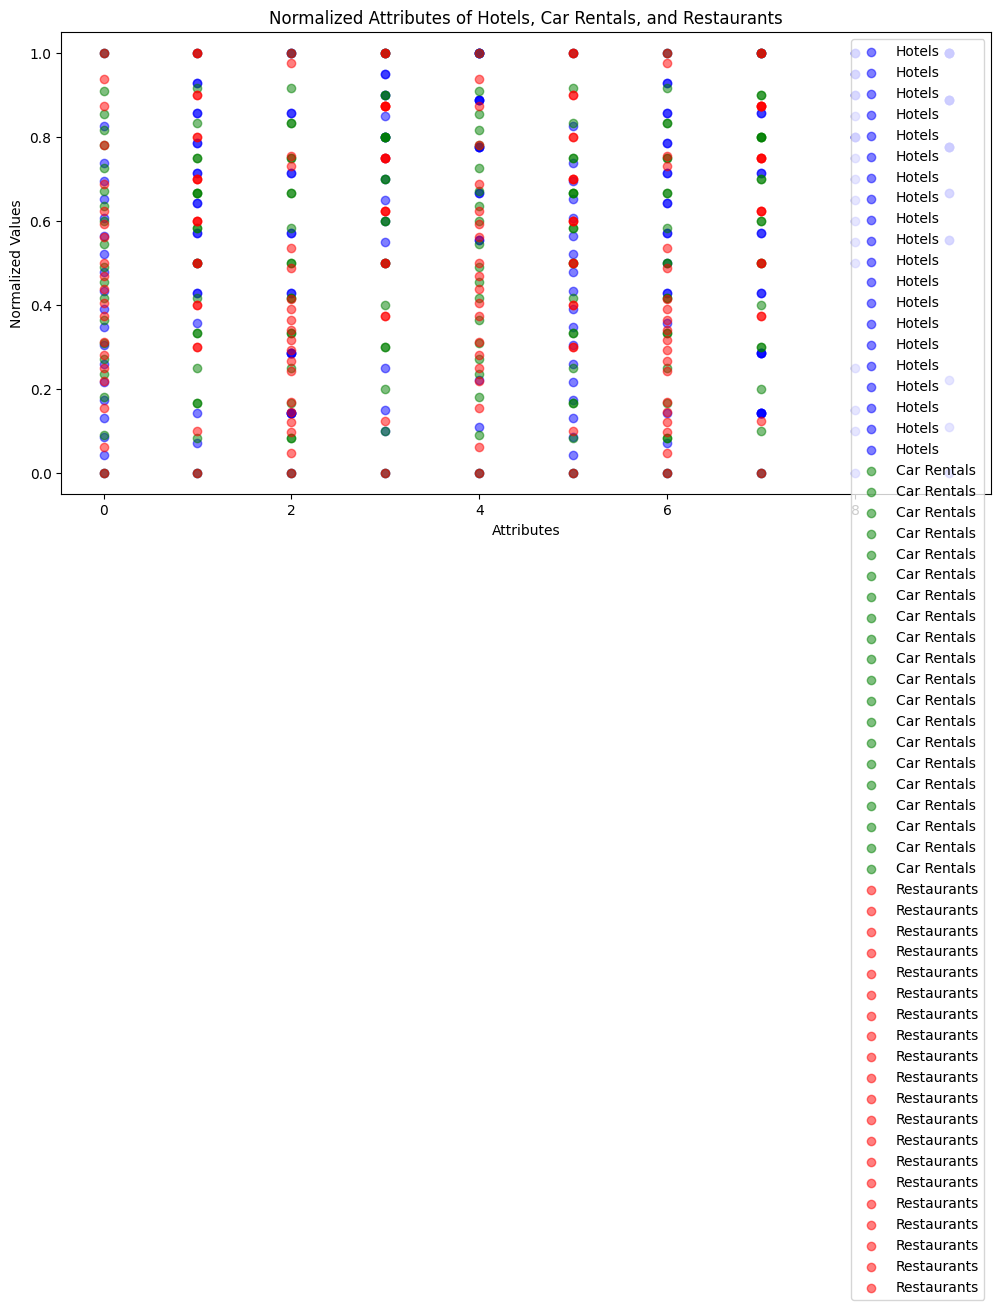

In [55]:
# Plot the data
plot_normalized_data(hotel_data, car_data, restaurant_data)

In [56]:
def normalize_attributes(data):
    if not data:
        return data

    numerical_data = []

    # Identify numerical attributes
    for item in data:
        numerical_item = {k: float(v) for k, v in item.items() if isinstance(v, (int, float)) or v.replace('.', '', 1).isdigit()}
        numerical_data.append(numerical_item)

    # Get min and max values for each numerical attribute
    min_vals = {key: min(item[key] for item in numerical_data) for key in numerical_data[0]}
    max_vals = {key: max(item[key] for item in numerical_data) for key in numerical_data[0]}

    # Normalize the numerical attributes
    normalized_data = []
    for item in numerical_data:
        normalized_item = {}
        for key in item.keys():
            normalized_item[key] = (item[key] - min_vals[key]) / (max_vals[key] - min_vals[key])
        normalized_data.append(normalized_item)

    return normalized_data




In [57]:
# Print the normalized data for verification
print("Normalized Hotel Data:", hotel_data)
print("Normalized Car Rental Data:", car_data)
print("Normalized Restaurant Data:", restaurant_data)

Normalized Hotel Data: [{'price': 0.30434782608695654, 'rating': 0.7142857142857141, 'distance': 0.5714285714285714, 'reservations': 0.75, 'service_quality': 0.8888888888888884, 'price_z': 0.30434782608695654, 'rating_z': 0.7142857142857141, 'distance_z': 0.5714285714285714, 'reservations_z': 0.75, 'service_quality_z': 0.8888888888888884}, {'price': 0.5652173913043478, 'rating': 0.8571428571428571, 'distance': 0.2857142857142857, 'reservations': 0.5, 'service_quality': 0.7777777777777777, 'price_z': 0.5652173913043478, 'rating_z': 0.8571428571428571, 'distance_z': 0.2857142857142857, 'reservations_z': 0.5, 'service_quality_z': 0.7777777777777776}, {'price': 0.13043478260869565, 'rating': 0.35714285714285704, 'distance': 0.8571428571428571, 'reservations': 0.25, 'service_quality': 0.5555555555555554, 'price_z': 0.13043478260869565, 'rating_z': 0.35714285714285704, 'distance_z': 0.8571428571428571, 'reservations_z': 0.25000000000000006, 'service_quality_z': 0.5555555555555552}, {'price':

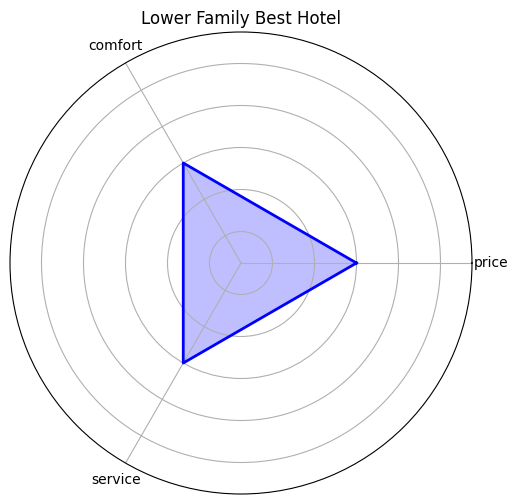

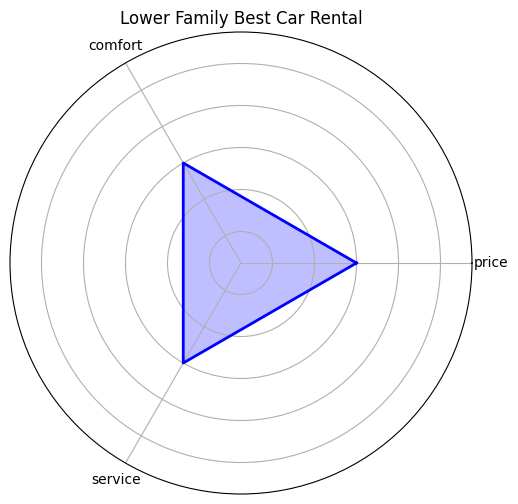

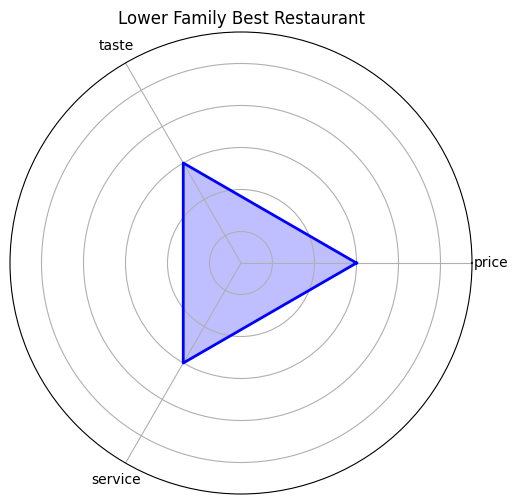

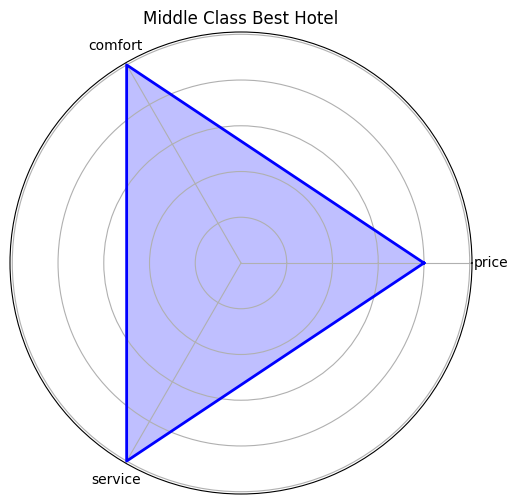

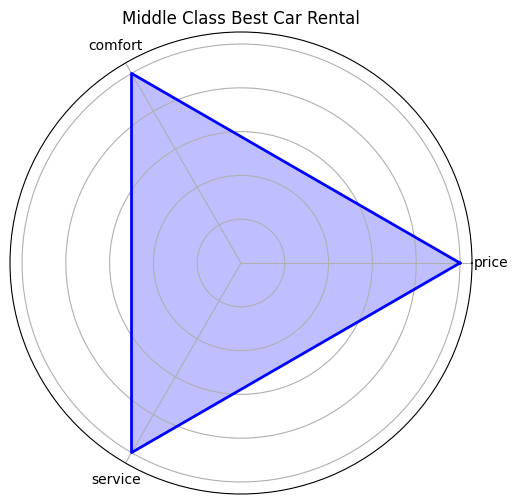

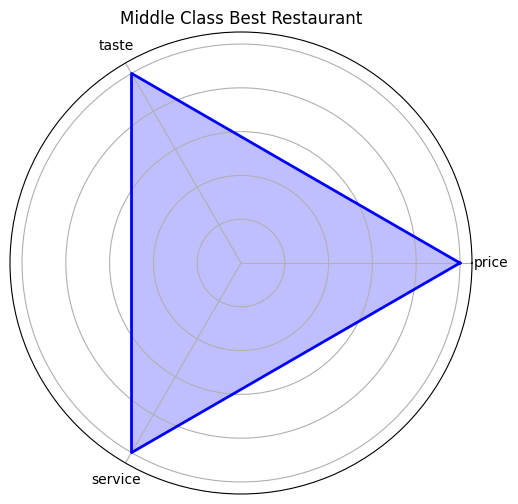

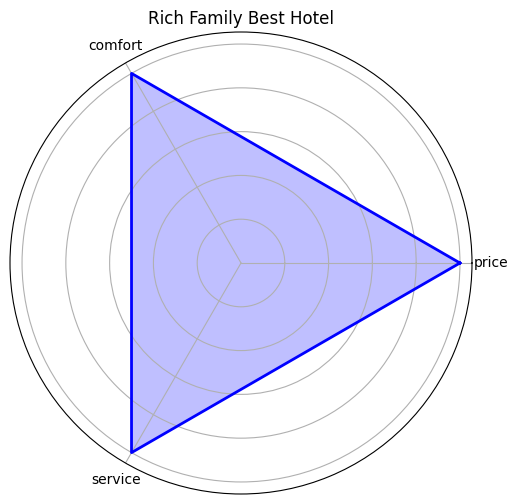

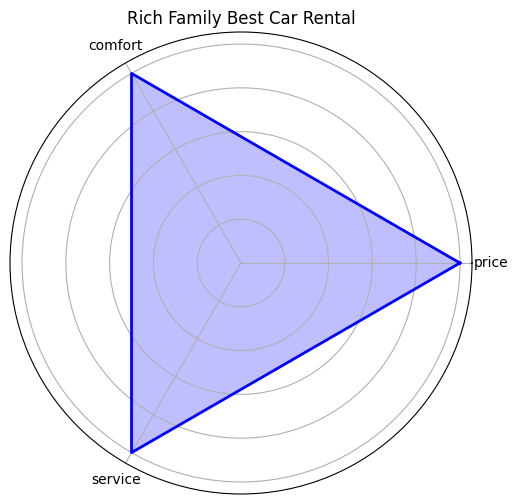

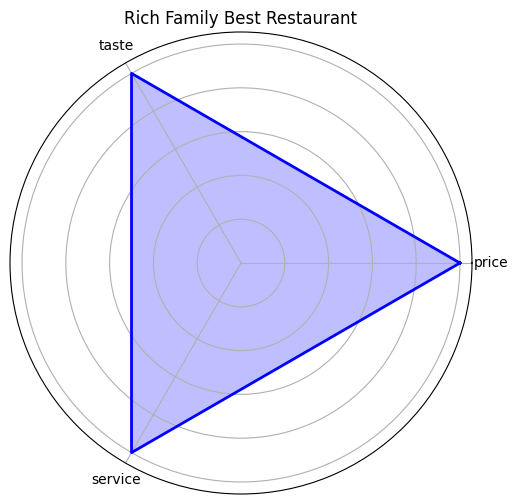

In [58]:
import matplotlib.pyplot as plt
import numpy as np

# Function to create a radar chart
def create_radar_chart(data, title):
    attributes = list(data.keys())
    values = list(data.values())

    num_vars = len(attributes)

    # Compute angle of each axis
    angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()

    # The plot is a circle
    values += values[:1]
    angles += angles[:1]

    fig, ax = plt.subplots(figsize=(6, 6), subplot_kw=dict(polar=True))

    ax.fill(angles, values, color='blue', alpha=0.25)
    ax.plot(angles, values, color='blue', linewidth=2)

    ax.set_yticklabels([])
    ax.set_xticks(angles[:-1])
    ax.set_xticklabels(attributes)

    plt.title(title)
    plt.show()

# Function to convert all data values to float
def convert_to_float(data):
    for item in data:
        for key in item.keys():
            try:
                item[key] = float(item[key])
            except ValueError:
                item[key] = 0.0  # Handle non-convertible values as needed
    return data

# Normalize the attributes for visualization
def normalize_attributes(data):
    min_vals = {key: min(item[key] for item in data) for key in data[0].keys()}
    max_vals = {key: max(item[key] for item in data) for key in data[0].keys()}
    normalized_data = []
    for item in data:
        normalized_item = {}
        for key in item.keys():
            normalized_item[key] = (item[key] - min_vals[key]) / (max_vals[key] - min_vals[key])
        normalized_data.append(normalized_item)
    return normalized_data

# Sample data for testing
hotels = [
    {'price': '100', 'comfort': '80', 'service': '70'},
    {'price': '120', 'comfort': '85', 'service': '75'},
    {'price': '150', 'comfort': '90', 'service': '80'}
]

car_rentals = [
    {'price': '50', 'comfort': '60', 'service': '55'},
    {'price': '55', 'comfort': '65', 'service': '60'},
    {'price': '60', 'comfort': '70', 'service': '65'}
]

restaurants = [
    {'price': '30', 'taste': '80', 'service': '75'},
    {'price': '35', 'taste': '85', 'service': '80'},
    {'price': '40', 'taste': '90', 'service': '85'}
]

# Convert data values to float
hotels = convert_to_float(hotels)
car_rentals = convert_to_float(car_rentals)
restaurants = convert_to_float(restaurants)

# Extract and normalize the attributes for visualization
hotel_data = normalize_attributes(hotels)
car_data = normalize_attributes(car_rentals)
restaurant_data = normalize_attributes(restaurants)

# Sample best services data for testing
best_services = {
    'lower_family': {
        'hotel': hotel_data[0],
        'car_rental': car_data[0],
        'restaurant': restaurant_data[0]
    },
    'middle_class': {
        'hotel': hotel_data[1],
        'car_rental': car_data[1],
        'restaurant': restaurant_data[1]
    },
    'rich_family': {
        'hotel': hotel_data[2],
        'car_rental': car_data[2],
        'restaurant': restaurant_data[2]
    }
}

# Visualize the best services for each income class
create_radar_chart(best_services['lower_family']['hotel'], "Lower Family Best Hotel")
create_radar_chart(best_services['lower_family']['car_rental'], "Lower Family Best Car Rental")
create_radar_chart(best_services['lower_family']['restaurant'], "Lower Family Best Restaurant")

create_radar_chart(best_services['middle_class']['hotel'], "Middle Class Best Hotel")
create_radar_chart(best_services['middle_class']['car_rental'], "Middle Class Best Car Rental")
create_radar_chart(best_services['middle_class']['restaurant'], "Middle Class Best Restaurant")

create_radar_chart(best_services['rich_family']['hotel'], "Rich Family Best Hotel")
create_radar_chart(best_services['rich_family']['car_rental'], "Rich Family Best Car Rental")
create_radar_chart(best_services['rich_family']['restaurant'], "Rich Family Best Restaurant")
